# About the dataset



### Data Preparation and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../churn/churn.csv', index_col=[0])

In [3]:
df.head().T

,0,1,2,3,4
age,18,32,44,37,31
gender,F,F,F,M,F
security_no,XW0DQ7H,5K0N3X1,1F2TCL3,VJGJ33N,SVZXCWB
region_category,Village,City,Town,City,City
membership_category,Platinum Membership,Premium Membership,No Membership,No Membership,No Membership
joining_date,2017-08-17,2017-08-28,2016-11-11,2016-10-29,2017-09-12
joined_through_referral,No,?,Yes,Yes,No
referral_id,xxxxxxxx,CID21329,CID12313,CID3793,xxxxxxxx
preferred_offer_types,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Credit/Debit Card Offers
medium_of_operation,?,Desktop,Desktop,Desktop,Smartphone


In [4]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [38]:
categorical = list((df.dtypes[df.dtypes == object]).index)

for category in categorical:
    print('{}: \n{} \n'.format(category, df[category].value_counts()))

gender: 
F    18549
M    18443
Name: gender, dtype: int64 

security_no: 
XW0DQ7H    1
4KYNLO2    1
0TNAZKG    1
O8IMCTW    1
UN03OJW    1
          ..
L9BXACS    1
ESEDJQ2    1
X92X4AF    1
V526FJ1    1
LBX0GLR    1
Name: security_no, Length: 36992, dtype: int64 

region_category: 
Town       14128
City       12737
Village    10127
Name: region_category, dtype: int64 

membership_category: 
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64 

joining_date: 
2015-06-02    55
2015-07-04    51
2015-06-21    50
2015-06-26    49
2016-08-03    49
              ..
2016-03-16    19
2016-06-03    18
2015-09-12    18
2017-07-03    18
2015-03-04    16
Name: joining_date, Length: 1096, dtype: int64 

joined_through_referral: 
Yes    21153
No     15839
Name: joined_through_referral, dtype: int64 

referral_id: 
xxxxxxxx    17846
CID43705      

In [7]:
numerical = list((df.dtypes[df.dtypes != object]).index)

for num in numerical:
    print('{}: \n{} \n'.format(num, df[num].value_counts()))

age: 
33    720
42    716
16    716
38    714
30    711
61    709
60    704
57    704
41    699
59    696
55    695
28    694
34    692
47    691
21    689
32    685
17    683
56    682
29    681
48    680
45    680
46    679
58    678
62    677
22    677
26    675
53    675
52    672
64    672
10    670
14    670
49    669
23    669
36    668
44    661
12    661
19    660
51    660
27    659
43    657
63    656
35    656
50    656
11    654
13    654
37    653
15    649
24    645
39    642
20    641
31    636
25    635
18    629
40    628
54    608
Name: age, dtype: int64 

days_since_last_login: 
 12     2380
 13     2373
 14     2307
 15     2278
 11     2262
 10     2091
 16     2068
-999    1999
 9      1863
 17     1747
 8      1571
 18     1444
 7      1442
 19     1308
 6      1257
 5      1234
 20     1184
 21     1015
 4       998
 22      895
 3       852
 23      727
 2       613
 24      471
 1       328
 25      203
 26       82
Name: days_since_last_login, dtype: int64 


In [8]:
df.isnull().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [9]:
df[df['gender'] == 'Unknown'].churn_risk_score.value_counts()

0    30
1    29
Name: churn_risk_score, dtype: int64

In [10]:
df['gender'].replace('Unknown', 'F', inplace = True)

In [39]:
df.isnull().sum()

age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [12]:
df['region_category'].fillna('Village', inplace=True)

In [13]:
df.isnull().sum()

age                                0
gender                             0
security_no                        0
region_category                    0
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [14]:
points_in_wallet_mean = df['points_in_wallet'].mean()
df['points_in_wallet'].fillna(points_in_wallet_mean, inplace = True)

In [18]:
df['medium_of_operation'].replace('?', 'Both', inplace = True)
df['joined_through_referral'].replace('?', 'Yes', inplace = True)

In [19]:
df['preferred_offer_types'].fillna('Without Offers', inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               36992 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36992 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [92]:
df = df[df.select_dtypes(include=[np.number]).ge(0).all(1)] #drop rows that contain negative numbers

In [93]:
df

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,Both,...,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,F,GWAHGJY,Village,Premium Membership,2016-10-25,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,...,418.38,56397.21,7.0,725.890000,Yes,Yes,Yes,Unsolved,Products always in Stock,0
36986,27,M,8X0LUUS,Town,Platinum Membership,2015-09-07,Yes,CID15800,Credit/Debit Card Offers,Desktop,...,135.83,8225.68,16.0,748.570000,Yes,No,No,Not Applicable,No reason specified,0
36989,23,F,XK1IM9H,Village,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,...,154.94,38127.56,17.010,680.470000,No,Yes,Yes,Unsolved,Poor Website,1
36990,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,...,482.61,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,0


### Setting up validation framework

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [96]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.35, random_state = 1)

In [97]:
print(len(df_train))
print(len(df_val))
print(len(df_test))

17285
9308
6649


In [98]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [99]:
y_train = df_train.churn_risk_score.values
y_val = df_val.churn_risk_score.values
y_test = df_test.churn_risk_score.values

In [100]:
del df_train['churn_risk_score']
del df_val['churn_risk_score']
del df_test['churn_risk_score']

### Exploratory Data Analysis

In [101]:
df_full_train.reset_index(drop = True)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,10,M,U0J67QN,Village,Basic Membership,2016-03-27,Yes,CID25357,Gift Vouchers/Coupons,Smartphone,...,45.79,3277.37,16.0,686.882199,No,Yes,Yes,Unsolved,Poor Product Quality,1
1,53,M,QWIAN3Y,Village,Basic Membership,2016-12-14,No,xxxxxxxx,Without Offers,Both,...,48.02,20436.28,5.0,676.570000,No,Yes,Yes,No Information Available,Too many ads,1
2,39,M,XDRZDVT,Village,Gold Membership,2015-10-20,Yes,CID30338,Credit/Debit Card Offers,Desktop,...,130.88,19537.67,21.0,1226.484350,Yes,No,Yes,Unsolved,Too many ads,0
3,12,F,QX5QDE6,Town,No Membership,2017-01-02,Yes,CID15203,Gift Vouchers/Coupons,Desktop,...,311.19,32891.57,21.0,686.882199,No,Yes,Yes,Unsolved,Poor Product Quality,1
4,60,M,P2838SH,Village,Platinum Membership,2017-11-24,Yes,CID26426,Gift Vouchers/Coupons,Both,...,76.76,2352.24,7.0,791.740000,No,Yes,Yes,No Information Available,Too many ads,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26588,42,F,6FDBJUJ,City,Platinum Membership,2017-02-28,Yes,CID59254,Gift Vouchers/Coupons,Desktop,...,661.42,20430.56,1.0,1125.992344,Yes,Yes,Yes,Unsolved,Quality Customer Care,0
26589,40,F,TCDBK8Z,City,Basic Membership,2016-11-04,No,xxxxxxxx,Without Offers,Desktop,...,121.16,7683.01,14.0,693.780000,Yes,No,No,Not Applicable,Too many ads,1
26590,31,F,A9FH43V,Town,Premium Membership,2017-12-26,Yes,CID12248,Gift Vouchers/Coupons,Both,...,231.24,67602.94,6.0,734.340000,Yes,No,No,Not Applicable,User Friendly Website,0
26591,39,F,WSY0HAP,City,Gold Membership,2015-01-27,Yes,CID25765,Gift Vouchers/Coupons,Smartphone,...,148.62,72063.51,-20.087168346998617,686.882199,No,Yes,Yes,Solved,User Friendly Website,0


In [102]:
df_full_train.churn_risk_score.value_counts(normalize=True)

1    0.538149
0    0.461851
Name: churn_risk_score, dtype: float64

In [103]:
numerical = ['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

categorical = ['gender',
 'security_no',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [104]:
df_full_train[categorical].nunique()

gender                              2
security_no                     26593
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
referral_id                      9138
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 22897
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
dtype: int64

#### Feature Importance

In [105]:
from IPython.display import display

In [106]:
global_churn = df_full_train.churn_risk_score.mean()
global_churn

0.5381491369909375

In [107]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn_risk_score.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
F,0.542704,13418,0.004555,1.008464
M,0.533510,13175,-0.004639,0.991380




security_no


,mean,count,diff,risk
security_no,,,,
000NYHU,1.0,1,0.461851,1.858221
002F9PP,1.0,1,0.461851,1.858221
0038JWG,1.0,1,0.461851,1.858221
003B68P,0.0,1,-0.538149,0.000000
003WKVO,1.0,1,0.461851,1.858221
...,...,...,...,...
ZZPOVLW,0.0,1,-0.538149,0.000000
ZZSIVU3,1.0,1,0.461851,1.858221
ZZTSK9A,0.0,1,-0.538149,0.000000




region_category


,mean,count,diff,risk
region_category,,,,
City,0.548717,9196,0.010568,1.019637
Town,0.537983,10123,-0.000166,0.999691
Village,0.525021,7274,-0.013129,0.975604




membership_category


,mean,count,diff,risk
membership_category,,,,
Basic Membership,0.965786,5524,0.427637,1.794643
Gold Membership,0.368986,4843,-0.169163,0.685658
No Membership,0.970327,5527,0.432178,1.803083
Platinum Membership,0.000000,3178,-0.538149,0.000000
Premium Membership,0.000000,3195,-0.538149,0.000000
Silver Membership,0.422099,4326,-0.116050,0.784353




joining_date


,mean,count,diff,risk
joining_date,,,,
2015-01-01,0.812500,16,0.274351,1.509805
2015-01-02,0.578947,19,0.040798,1.075812
2015-01-03,0.391304,23,-0.146845,0.727130
2015-01-04,0.521739,23,-0.016410,0.969507
2015-01-05,0.548387,31,0.010238,1.019024
...,...,...,...,...
2017-12-27,0.363636,22,-0.174513,0.675717
2017-12-28,0.500000,20,-0.038149,0.929110
2017-12-29,0.481481,27,-0.056668,0.894699




joined_through_referral


,mean,count,diff,risk
joined_through_referral,,,,
No,0.519993,11529,-0.018156,0.966262
Yes,0.552045,15064,0.013895,1.025821




referral_id


,mean,count,diff,risk
referral_id,,,,
CID100,1.000000,1,0.461851,1.858221
CID10005,1.000000,1,0.461851,1.858221
CID10011,0.500000,2,-0.038149,0.929110
CID10014,0.000000,1,-0.538149,0.000000
CID10018,1.000000,1,0.461851,1.858221
...,...,...,...,...
CID9993,1.000000,1,0.461851,1.858221
CID9996,0.000000,1,-0.538149,0.000000
CID9999,0.000000,4,-0.538149,0.000000




preferred_offer_types


,mean,count,diff,risk
preferred_offer_types,,,,
Credit/Debit Card Offers,0.537644,8846,-0.000505,0.999062
Gift Vouchers/Coupons,0.508553,8827,-0.029596,0.945004
Without Offers,0.567937,8920,0.029788,1.055353




medium_of_operation


,mean,count,diff,risk
medium_of_operation,,,,
Both,0.531557,6718,-0.006592,0.987750
Desktop,0.527187,9913,-0.010963,0.979629
Smartphone,0.553503,9962,0.015354,1.028531




internet_option


,mean,count,diff,risk
internet_option,,,,
Fiber_Optic,0.543792,8803,0.005643,1.010485
Mobile_Data,0.541498,8868,0.003348,1.006222
Wi-Fi,0.529254,8922,-0.008896,0.983470




last_visit_time


,mean,count,diff,risk
last_visit_time,,,,
00:00:00,0.0,1,-0.538149,0.000000
00:00:02,1.0,1,0.461851,1.858221
00:00:03,1.0,1,0.461851,1.858221
00:00:04,1.0,1,0.461851,1.858221
00:00:05,1.0,1,0.461851,1.858221
...,...,...,...,...
23:59:48,1.0,1,0.461851,1.858221
23:59:52,0.5,2,-0.038149,0.929110
23:59:55,1.0,1,0.461851,1.858221




used_special_discount


,mean,count,diff,risk
used_special_discount,,,,
No,0.542557,11984,0.004408,1.008190
Yes,0.534534,14609,-0.003616,0.993281




offer_application_preference


,mean,count,diff,risk
offer_application_preference,,,,
No,0.549743,11851,0.011594,1.021543
Yes,0.528829,14742,-0.009320,0.982681




past_complaint


,mean,count,diff,risk
past_complaint,,,,
No,0.532579,13352,-0.005570,0.989650
Yes,0.543766,13241,0.005616,1.010437




complaint_status


,mean,count,diff,risk
complaint_status,,,,
No Information Available,0.542466,3285,0.004317,1.008021
Not Applicable,0.532579,13352,-0.005570,0.989650
Solved,0.547884,3331,0.009734,1.018089
Solved in Follow-up,0.548851,3265,0.010702,1.019887
Unsolved,0.536012,3360,-0.002137,0.996029




feedback


,mean,count,diff,risk
feedback,,,,
No reason specified,0.629613,4525,0.091464,1.169961
Poor Customer Service,0.638279,4462,0.100130,1.186063
Poor Product Quality,0.650261,4592,0.112112,1.208329
Poor Website,0.630386,4502,0.092237,1.171397
Products always in Stock,0.000000,981,-0.538149,0.000000
Quality Customer Care,0.000000,1002,-0.538149,0.000000
Reasonable Price,0.000000,1028,-0.538149,0.000000
Too many ads,0.621242,4491,0.083093,1.154406
User Friendly Website,0.000000,1010,-0.538149,0.000000


In [108]:
from sklearn.metrics import mutual_info_score

In [109]:
def mutual_information_score(series):
    return mutual_info_score(series, df_full_train.churn_risk_score)

In [110]:
df_full_train[categorical].apply(mutual_information_score).sort_values(ascending = False)

security_no                     0.690234
last_visit_time                 0.594846
membership_category             0.400812
referral_id                     0.235327
feedback                        0.132935
joining_date                    0.020804
preferred_offer_types           0.001185
joined_through_referral         0.000507
medium_of_operation             0.000290
offer_application_preference    0.000217
region_category                 0.000173
complaint_status                0.000089
internet_option                 0.000082
past_complaint                  0.000063
gender                          0.000043
used_special_discount           0.000032
dtype: float64

In [111]:
df_full_train[numerical].corrwith(df_full_train.churn_risk_score)

age                      0.001828
days_since_last_login    0.023978
avg_time_spent          -0.011236
avg_transaction_value   -0.218955
points_in_wallet        -0.294206
dtype: float64

### One-Hot Encoding

In [68]:
from sklearn.feature_extraction import DictVectorizer

In [114]:
df_train = df_train.drop(['security_no', 'referral_id'], axis=1)
df_val = df_val.drop(['security_no', 'referral_id'], axis=1)

In [116]:
numerical = ['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

categorical = ['gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [117]:
train_dicts = df_train[categorical+numerical].to_dict(orient='records')

In [118]:
dv = DictVectorizer(sparse=False)

In [119]:
X_train = dv.fit_transform(train_dicts)

In [120]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')

In [121]:
X_val = dv.transform(val_dicts)

### Training Model

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Bolu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
y_pred = model.predict(X_val)

In [132]:
(y_pred == y_val).mean()

0.8625913192952299

### Using the model

In [133]:
df_full_train = df_full_train.drop(['security_no', 'referral_id'], axis=1)
df_test = df_test.drop(['security_no', 'referral_id'], axis=1)

In [134]:
dicts_full_train = df_full_train[categorical+numerical].to_dict(orient='records')

In [135]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [136]:
y_full_train = df_full_train.churn_risk_score.values

In [137]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

C:\Users\Bolu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [138]:
dicts_test = df_test[categorical+numerical].to_dict(orient='records')

In [139]:
X_test = dv.transform(dicts_test)

In [140]:
y_predict = model.predict_proba(X_test)[:,1]

In [141]:
churn_decision_test = (y_predict >= 0.5)

In [142]:
(churn_decision_test == y_test).mean()

0.7886900285757257

### Evaluation Metrics

In [144]:
from sklearn.metrics import accuracy_score

In [149]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.538
0.05 0.863
0.10 0.863
0.15 0.863
0.20 0.863
0.25 0.863
0.30 0.863
0.35 0.863
0.40 0.863
0.45 0.863
0.50 0.863
0.55 0.863
0.60 0.863
0.65 0.863
0.70 0.863
0.75 0.863
0.80 0.863
0.85 0.863
0.90 0.863
0.95 0.863
1.00 0.863


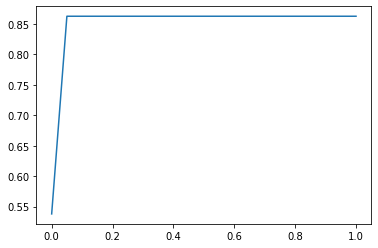

In [150]:
plt.plot(thresholds, accuracies)

In [151]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_test, y_predict >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.542
0.05 0.610
0.10 0.659
0.15 0.694
0.20 0.722
0.25 0.744
0.30 0.759
0.35 0.769
0.40 0.777
0.45 0.783
0.50 0.789
0.55 0.790
0.60 0.793
0.65 0.792
0.70 0.779
0.75 0.757
0.80 0.737
0.85 0.705
0.90 0.661
0.95 0.582
1.00 0.458


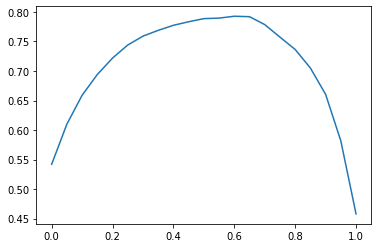

In [152]:
plt.plot(thresholds, accuracies)

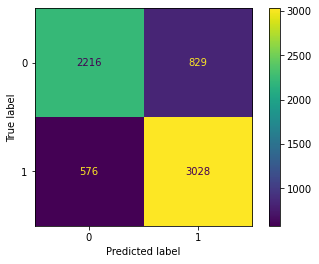

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

prediction = (y_predict >= 0.5).astype(int)
cm = confusion_matrix(y_test, prediction)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)

cm_disp.plot()

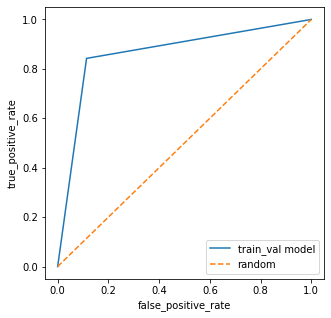

In [154]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='train_val model')
plt.plot([0,1], [0,1], label='random', linestyle='--')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.legend()

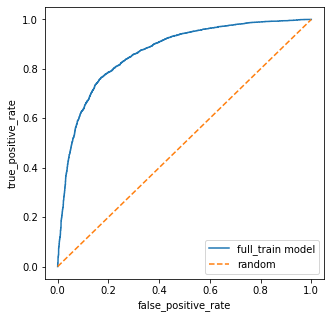

In [155]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test, y_predict)

plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='full_train model')
plt.plot([0,1], [0,1], label='random', linestyle='--')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.legend()

In [156]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, y_pred)

0.8642492941526115

In [157]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_predict)

0.8683816922995613